In [1]:
from PIL import Image, ImageDraw, ImageFont
from os import listdir
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
##https://www.kaggle.com/code/anokas/kuzushiji-visualisation/notebook

In [2]:
# From https://www.google.com/get/noto/
fontsize = 30
!wget -q --show-progress https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKjp-hinted.zip
!unzip -p NotoSansCJKjp-hinted.zip NotoSansCJKjp-Regular.otf > NotoSansCJKjp-Regular.otf
!rm NotoSansCJKjp-hinted.zip

font = ImageFont.truetype('./NotoSansCJKjp-Regular.otf', fontsize, encoding='utf-8')

NotoSansCJKjp-hinte 100%[===================>] 115.49M  27.2MB/s    in 4.2s    


In [3]:
root_dir = '/home/mauricio/Documents/Pytorch/mmdetection/mmdetection_mau/data/HanDataset/'  #Nancho_dataset, kuzushiji
df_train = pd.read_csv(root_dir+'train.csv')
img_folder= 'train_images'
#df_train = pd.read_csv('data/cropped.csv')

unicode_map = {codepoint: char for codepoint, char in pd.read_csv(root_dir+'unicode_translation.csv').values}

In [4]:
#unicode_map

In [5]:
def crop2(img, scale=1.0):
    cy, cx= img.size[1]/2, img.size[0]/2
    hs, ws= img.size[1]*scale, img.size[0]*scale
    lx, rx= cx-ws/2, cx+ws/2
    ty, by= cy-hs/2, cy+hs/2
    #img_cropped= img[int(ty):int(by), int(lx):int(rx)]
    img_cropped= img.crop((lx, ty, rx, by))
    print(img_cropped.size)
    return img_cropped

In [6]:
def scaleSize(x, y, w, h, img):
    #print("orig",x, y, w, h)
    x, y, w, h= float(x), float(y), float(w), float(h)
    o_w, o_h= 1754, 1240
    #wo, ho= img.size
    #print(, float(x+w))
    yy, xx= (y+h)/2, (x+w)/2
    scalex= 0.8 #o_w/wo
    scaley= 0.8 #o_h/ho
    hh, ww= float(h)*scaley, float(w)*scalex
    lx, rx= int(xx-ww/2), int(xx+ww/2)
    ty, by= int(yy-hh/2), int(yy+hh/2)
    #print(x, y, w, h)
    #print("scale:",scalex, scaley)
    #print("new",(int(int(x)*scalex), int(int(y)*scaley), int(int(w)*scalex), int(int(h)*scaley)))
    #print("new:",lx, ty, rx, by)
    return lx, ty, rx, by
    #return (int(int(x)*scalex), int(int(y)*scaley), int(int(w)*scalex), int(int(h)*scaley))
    

In [7]:
# This function takes in a filename of an image, and the labels in the string format given in train.csv, and returns an image 
#containing the bounding boxes and characters annotated
def visualize_training_data(image_fn, labels):
    # Convert annotation string to array
    labels = np.array(labels.split(' ')).reshape(-1, 5)
    
    # Read image
    imsource = Image.open(image_fn).convert('RGBA')
    print(imsource.size)
    #imsource=crop2(imsource,.8)
    
    #scalled= scaleSize(imsource) #added by mau
    bbox_canvas = Image.new('RGBA', imsource.size) #imsource.size
    char_canvas = Image.new('RGBA', imsource.size) #imsource.size
    bbox_draw = ImageDraw.Draw(bbox_canvas) # Separate canvases for boxes and chars so a box doesn't cut off a character
    char_draw = ImageDraw.Draw(char_canvas)

    for codepoint, x, y, w, h in labels:
        x, y, w, h = int(x), int(y), int(w), int(h)
        #x, y, w, h = scaleSize(x, y, w, h, imsource)
        try:
            char = unicode_map[codepoint] # Convert codepoint to actual unicode character
        except Exception as e:
            char= 'c'

        # Draw bounding box around character, and unicode character next to it
        bbox_draw.rectangle((x, y, x+w, y+h), fill=(255, 255, 255, 0), outline=(255, 0, 0, 255))
        #char_draw.text((x + w + fontsize/4, y + h/2 - fontsize), char, fill=(0, 0, 255, 255), font=font)

    imsource = Image.alpha_composite(Image.alpha_composite(imsource, bbox_canvas), char_canvas)
    imsource = imsource.convert("RGB") # Remove alpha for saving in jpg format.
    return np.asarray(imsource)

(4393, 6048)


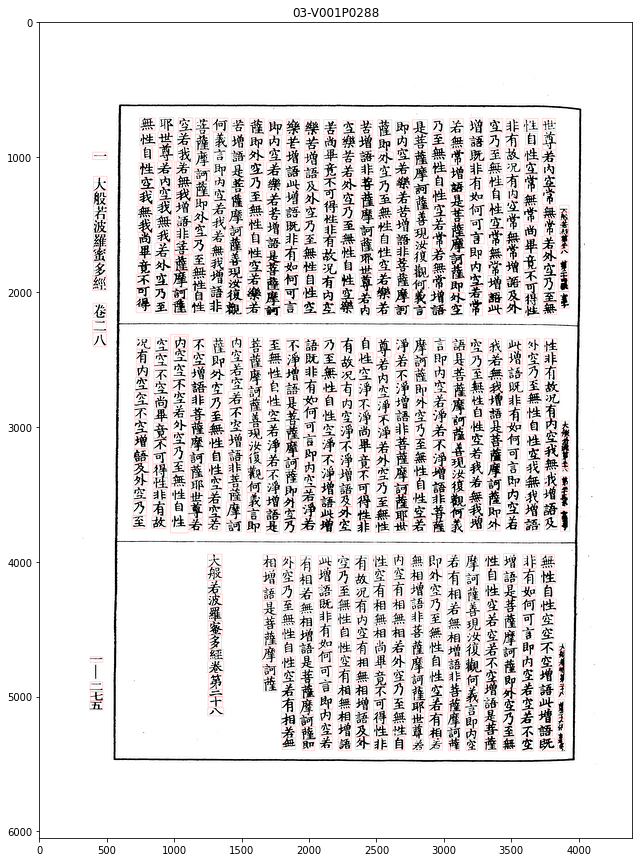

In [11]:
fontsize = 30
np.random.seed(1337)
#IMG 68 tiene mal delimitados los BBOX, por lo tanto se ha decicido excluirla, en lo que econtramos solucion~
#img= df_train['image_id'][8]
#label= df_train['labels'][8]
for i in range(len(df_train)):
    # img, labels = df_train.values[np.random.randint(len(df_train))]
    img= df_train['image_id'][i]
    labels= df_train['labels'][i]
    if img== '03-V001P0288':
        viz = visualize_training_data(root_dir+img_folder+'/{}.jpg'.format(img), labels)
        #viz = visualize_training_data('data/cropped/{}.jpg'.format(img), labels)
        
        plt.figure(figsize=(15, 15))
        plt.title(img)
        plt.imshow(viz, interpolation='lanczos')
        plt.show()

In [17]:
a= '+8a9e 3193 843 99 85 U+83e9 1118 2856 116 97 U+6709 2232 2663 98 111 U+53ef 723 1957 96 80 U+6709 3462 1127 90 103 U+89c0 3156 4709 118 112 U+6027 740 1040 113 93 U+83e9 1936 4801 99 101 U+6469 3027 5116 91 111 U+662f 3297 5095 95 89 U+6027 984 3252 91 88 U+7a7a 1264 3365 94 105 U+6211 3187 3252 107 99 U+82e6 2381 728 91 98 U+4e0d 2093 3203 94 81 U+4e0d 2224 3099 100 84 U+82e5 404 1356 98 111 U+8a9e 1673 3609 115 93 U+85a9 2380 1599 100 105 U+83e9 3038 4898 93 103 U+81ea 1814 4586 72 98 U+0023 3862 3368 68 68 U+5897 3460 1767 100 93 U+82e5 2501 2065 93 107 U+76f8 2209 4914 107 76 U+5e38 3327 1769 102 109 U+81ea 2385 2330 66 99 U+7121 3460 1552 103 85 U+81f3 2250 1462 88 87 U+7121 2614 4374 103 97 U+5fa9 3055 3392 101 93 U+8a9e 3436 4066 110 98 U+82e5 2505 1854 103 93 U+81f3 1558 1252 98 82 U+81ea 2905 4692 75 85 U+7a7a 850 2663 106 95 U+8a36 3023 5231 95 70 U+6027 843 3378 110 79 U+85a9 2787 1287 97 105 U+7a7a 2234 2881 94 93 U+6a02 2503 1956 100 99 U+4e8c 3849 1837 72 29 U+7121 2912 1786 104 76 U+5373 1701 726 101 109 U+7121 2490 3600 111 91 U+5c1a 727 1365 114 85 U+8a36 3318 3382 107 83 U+6545 2340 4082 107 92 U+82e5 1400 2739 107 97 U+4f55 3577 4272 102 94 U+5916 1268 2571 111 81 U+5373 2640 736 99 92 U+7121 2476 4384 101 91 U+0023 3845 1903 77 93 U+6b64 3700 5005 115 74 U+6027 2479 5208 108 85 U+82e5 2243 1053 89 93 U+7a7a 3752 3025 90 93 U+82e5 2609 4579 107 98 U+7f85 1248 4333 106 103 U+8a00 2073 4869 99 101 U+7121 3614 2747 109 79 U+5584 2788 1400 91 113 U+5f97 2355 3505 107 97 U+975e 1015 1523 100 85 U+7a7a 3047 2090 97 85 U+4f55 1819 1860 106 93 U+5897 1825 1246 96 105 U+4f55 3047 3598 107 77 U+76f8 1927 4399 107 87 U+6c5d 1550 3101 100 77 U+4e00 377 4706 95 38 U+5185 3753 2938 89 83 U+6a02 1833 717 98 120 U+6c5d 2778 1615 97 70 U+8a9e 3061 2338 105 99 U+6b64 2086 3607 105 67 U+8a00 1537 3603 100 87 U+7562 735 1653 97 97 U+8a9e 3595 3684 114 88 U+4e8c 3866 1630 58 31 U+6027 1956 1774 107 81 U+5897 2086 3402 108 102 U+76f8 2611 4479 99 87 U+83e9 2772 833 106 109 U+7562 2486 4690 89 99 U+5185 3732 1051 93 76 U+4e43 1140 1604 88 100 U+8a36 2634 2092 108 81 U+5897 1681 3494 100 109 U+5897 2907 1987 101 101 U+81ea 1713 2650 66 93 U+5897 1966 954 99 112 U+5373 1967 3164 92 91 U+8a36 3439 4633 109 76 U+4e0d 3591 1841 98 80 U+5897 3710 4791 97 97 U+82e5 2767 3682 102 97 U+7a7a 2622 4045 91 93 U+6709 1795 5005 102 109 U+5373 1154 1309 98 83 U+662f 1936 4696 101 87 U+4e43 1963 1468 88 88 U+8a9e 1966 2344 106 94 U+5916 2609 4689 105 96 U+5185 2104 1985 77 79 U+82e5 3865 3075 69 49 U+5897 3702 5089 99 105 U+82e5 1116 3684 95 87 U+6211 876 1326 105 95 U+4e0d 2105 1149 94 75 U+7562 2361 3086 101 101 U+8a9e 1657 4184 96 101 U+85a9 1005 1618 105 103 U+6027 3331 1135 106 87 U+81ea 3215 2850 71 87 U+5c1a 3595 1502 95 89 U+5897 3441 3938 99 107 U+7a7a 2646 933 99 91 U+82e5 2369 2002 93 85 U+7121 2908 923 104 96 U+6027 3595 934 107 95 U+5916 2885 4057 103 88 U+82e5 3722 952 108 85 U+6027 1254 3271 108 87 U+5916 2786 2778 93 83 U+4e0d 2640 2568 91 91 U+0023 3838 5315 52 27 U+5c1a 852 2770 101 89 U+65e2 3478 2665 109 82 U+4e0d 851 2571 97 81 U+5897 1013 1330 106 89 U+82e5 1684 1265 110 94 U+5916 3041 2008 116 74 U+0023 3863 3620 68 155 U+4e43 2104 2340 93 99 U+6709 3460 825 93 99 U+7a7a 1701 931 97 103 U+5185 2376 2095 82 79 U+82e5 1795 5220 108 83 U+6709 2234 2341 100 115 U+82e5 1545 1860 95 89 U+5897 1690 1478 100 99 U+5373 2786 2684 88 87 U+85a9 1823 3314 91 105 U+8a00 3470 3252 88 93 U+8a9e 1825 1361 114 91 U+6709 2073 4458 93 101 U+6709 722 2427 85 103 U+51b5 3749 2751 107 76 U+51b5 2235 2581 107 74 U+85a9 3032 5307 84 93 U+4e43 2918 719 76 97 U+8a36 2373 1507 109 81 U+6de8 2505 2796 97 107 U+81ea 3346 1229 75 89 U+7121 2348 4807 97 87 U+8036 2757 5035 101 81 U+975e 3584 3947 98 99 U+53ca 2342 5207 105 87 U+6469 1552 2569 99 120 U+89c0 2769 1791 116 102 U+83e9 2382 1147 100 97 U+7a7a 3733 1136 92 89 U+8a9e 3039 1180 118 83 U+89c0 1547 3286 110 104 U+4e0d 2363 2786 92 86 U+82e6 1698 1369 98 99 U+83e9 3444 4271 98 105 U+7d93 3856 1526 67 45 U+7a7a 1708 2867 73 69 U+6469 2772 2337 109 129 U+8a36 2753 4834 97 83 U+7fa9 3168 4924 87 120 U+7a7a 2616 4799 97 91 U+6545 2234 2468 106 99 U+6b64 3468 2355 113 80 U+5916 3431 4941 105 76 U+8a00 2918 2338 93 99 U+6469 2773 1065 108 116 U+4e0d 985 2640 105 91 U+82e5 1278 1542 96 92 U+8a36 2777 2472 103 81 U+5185 2622 3947 87 81 U+6469 1820 3101 104 118 U+82e5 987 2838 103 97 U+7121 1708 2445 91 87 U+6709 3750 2834 82 99 U+81f3 1798 4282 91 89 U+4f55 3468 3053 105 87 U+81ea 2229 4478 74 88 U+7121 3320 2558 114 93 U+6469 2380 1383 103 111 U+4e0d 2918 3086 96 94 U+81ea 745 710 114 95 U+7a7a 2507 2692 87 95 U+5341 3851 1870 72 27 U+7121 1927 4300 107 87 U+8a36 987 1973 113 79 U+7fa9 3052 3682 98 104 U+82e5 1252 3682 96 89 U+822c 3864 3016 64 54 U+85a9 3053 1486 103 107 U+6027 1129 2066 100 88 U+7a7a 1412 2943 97 94 U+7a7a 709 2947 92 106 U+82e5 1942 3460 107 95 U+76f8 3025 4195 104 87 U+82e5 1279 1340 107 87 U+65e2 1967 2453 108 77 U+662f 3068 2449 88 101 U+73fe 1543 3014 109 76 U+85a9 1423 1268 87 103 U+82e5 2498 2488 101 100 U+6469 3047 1597 109 106 U+7121 3182 3469 106 92 U+82e5 1537 2071 99 93 U+85a9 1155 1180 108 113 U+53ca 3742 3669 97 93 U+662f 3047 1277 105 97 U+7a7a 2233 1970 100 89 U+7a7a 1149 1496 101 99 U+8a9e 703 3166 107 93 U+6de8 2646 2661 95 109 U+82e5 3324 2454 111 92 U+7a7a 2081 5194 91 90 U+81f3 3620 2649 91 81 U+82e5 1249 4138 100 97 U+7121 3026 4415 101 84 U+53ef 1963 2955 92 87 U+7a7a 1811 3606 95 83 U+5897 707 3059 94 102 U+53ef 2077 4764 95 94 U+82e5 3189 1963 98 79 U+6b64 3328 2094 103 73 U+6ce2 1246 4241 112 81 U+7121 1800 5308 101 82 U+4e43 2781 2977 81 95 U+6a02 1535 1958 114 107 U+6de8 2362 2877 98 111 U+4f55 1958 2850 109 93 U+7121 2508 1365 108 91'
labelss = np.array(labels.split(' ')).reshape(-1, 5)
boxs=[]
for i in labelss:
    boxs.append(i[1::])
boxs

[array(['1482', '1947', '48', '62'], dtype='<U6'),
 array(['1573', '254', '94', '93'], dtype='<U6'),
 array(['1205', '1217', '83', '73'], dtype='<U6'),
 array(['1197', '1132', '94', '81'], dtype='<U6'),
 array(['1202', '800', '97', '84'], dtype='<U6'),
 array(['1588', '2608', '52', '48'], dtype='<U6'),
 array(['1349', '2354', '44', '56'], dtype='<U6'),
 array(['802', '970', '90', '80'], dtype='<U6'),
 array(['1337', '491', '84', '67'], dtype='<U6'),
 array(['1292', '2111', '46', '47'], dtype='<U6'),
 array(['1536', '2362', '45', '53'], dtype='<U6'),
 array(['1052', '424', '90', '67'], dtype='<U6'),
 array(['794', '1129', '96', '87'], dtype='<U6'),
 array(['1416', '2032', '55', '48'], dtype='<U6'),
 array(['1465', '487', '78', '85'], dtype='<U6'),
 array(['1258', '2762', '60', '52'], dtype='<U6'),
 array(['1336', '2679', '52', '59'], dtype='<U6'),
 array(['1448', '344', '96', '77'], dtype='<U6'),
 array(['1322', '1046', '100', '82'], dtype='<U6'),
 array(['1204', '726', '93', '72'], dty

In [18]:
import mmcv
from mmdet.core.bbox import bbox_overlaps
import torch 

def np_iof(bboxes, canvas):
    return bbox_overlaps(
        torch.FloatTensor(bboxes),
        torch.FloatTensor(canvas),
        'iof',
    ).numpy().reshape(-1)
    
def iter_target_crops(bboxes, w, h, size=1024):
    available_bboxes = bboxes.copy()
    while len(available_bboxes) > 0:
        # random pick a bbox
        idx = np.random.randint(0, len(available_bboxes))
        bbox = available_bboxes[idx]
        # random pick a crop region including the selected bbox
        x1, y1, x2, y2 = bbox
        lt_region = np.array([x2 - size, y2 - size, x1, y1])
        lt_region[0::2] = lt_region[0::2].clip(0, w - size)
        lt_region[1::2] = lt_region[1::2].clip(0, h - size)
        try:
            assert (lt_region[2] >= lt_region[0]) and \
                    (lt_region[3] >= lt_region[1])
        except Exception as e:
            print('--------')
            print("Error!!!")

        # make a crop
        x = np.random.randint(lt_region[0], lt_region[2] + 1)
        y = np.random.randint(lt_region[1], lt_region[3] + 1)
        print(x)
        crop = np.array([[x, y, x + size, y + size]])

        inds = np_iof(available_bboxes, crop) > 0.8
        available_bboxes = available_bboxes[~inds]
        yield crop.flatten().tolist()

In [19]:
iter_target_crops(boxs, 6048, 4393)

<generator object iter_target_crops at 0x7fdb33b266d0>